In [32]:
# disable warnings to tidy up output
import warnings
warnings.filterwarnings("ignore")

# some basic libraries 
from platform import python_version
#import pandas as pd
#import seaborn as sns
import numpy as np
import os
import random

# plot support
import matplotlib.pyplot as plt

# tensorflow support
import tensorflow as tf
import tensorflow_io as tfio

# scipy
import scipy

# reading audio datasets
import librosa
import librosa.display

[    2   131   187   247   303   397   454   613   767   909   972  1090
  1276  1339  1418  1603  1793  1976  2034  2097  2174  2229  2287  2355
  2487  2722  2825  2887  3027  3144  3193  3248  3328  3377  3521  3581
  3690  3757  3862  3950  4116  4294  4368  4544  4742  4830  4904  5078
  5244  5352  5417  5473  5544  5677  5790  5848  5960  6012  6180  6320
  6386  6487  6689  6792  7000  7242  7325  7484  7625  7706  7864  8038
  8192  8377  8572  8707  8875  9052  9157  9241  9344  9430  9525  9602
  9761  9840  9942 10000 10070 10156 10209 10384 10640 10738 10951 11068
 11207 11351 11559 11674 11746 11813 11868 11955 12034 12178 12262 12392
 12640 12799 12923 13117 13256 13321 13393 13619 13791 14109 14293 14431
 14839 15093 15765 16121 16283 16341 16464 16536 16759 16819 16926 17043
 17142 17340 17394 17537 17619 17771 17890 17948 18102 18185 18320 18418
 18489 18618 18678 18769 18932 19190 19367 19511 19592 19798 20008 20309
 20437 20497 20577 20748 20808 20927 21163 21344 21

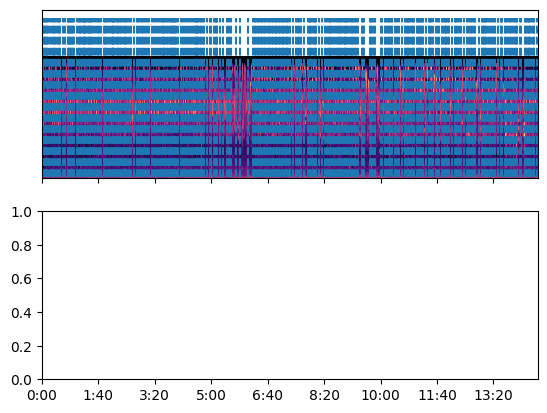

In [123]:
path = r'C:\Users\Tony\Documents\Data\3_Dataset_PE_2\Caligavis chrysops Yellow-faced honeyeater\X02647.wav'

y, sr = librosa.load(path)

ar = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

#img = librosa.display.specshow(ar, x_axis='time')


onset_frames = librosa.onset.onset_detect(y, sr=sr, backtrack = True, wait=50, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames)

onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

onset_samples = librosa.frames_to_samples(onset_frames)

fig, ax = plt.subplots(nrows=2, sharex=True)

S = librosa.stft(y)
logS = librosa.amplitude_to_db(abs(S))

S1 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, ax = ax[0],  x_axis='time')

Dp1 = librosa.pcen(S1, sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
#librosa.display.specshow(Dp1, ax = ax[1])
ax[0].vlines(onset_times, 0, S.max()*2 , linestyle='dashed')
ax[0].label_outer()

In [124]:
import soundfile as sf

for i in range(len(onset_samples)-1):
    start = onset_samples[i]
    end = onset_samples[i+1]
    path = str(i) + '.wav'
    if end > start + (22050*5):
        segment = y[start: start + (22050*5)]
    else:
        segment = y[start: end]
    
    sf.write(path, segment, 22050)
    

In [114]:
import antropy as ant
ant.spectral_entropy(y, sf=22050, method='welch', normalize=True)

0.9464189202003491

In [63]:
yp1 = librosa.feature.inverse.mel_to_audio(Dp1)

sf.write("DP1.wav", yp1, 22050)

In [71]:
from IPython.display import Audio, IFrame, display

display(Audio(yp1,rate=sr))

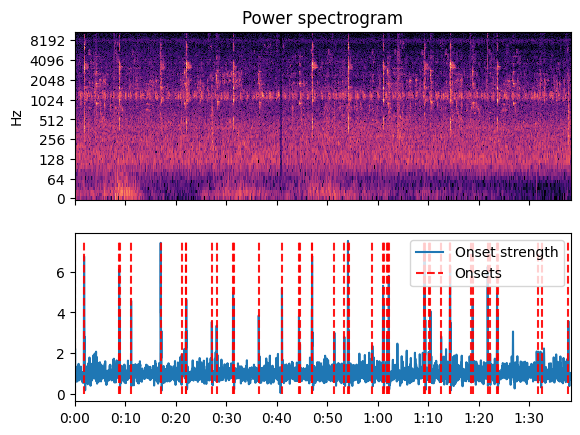

In [47]:
D = np.abs(librosa.stft(y))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')

ax[1].legend()